# Library installation:

In [1]:
# !pip install pandas
# !pip install scipy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

# Importing the all Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

In [12]:
df = pd.read_csv('parana_data.csv')
df.head()

,Easting,Northing,Response
0,402.95294,164.52841,306.09
1,501.70493,428.77100,200.88
2,556.32618,445.27065,167.07
3,573.40431,447.04177,162.77
4,702.42284,272.29590,163.57


In [13]:
df.columns

Index(['Easting', 'Northing', 'Response'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Easting   143 non-null    float64
 1   Northing  143 non-null    float64
 2   Response  143 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


### Descriptive Data Analysis:

          Easting    Northing    Response
count  143.000000  143.000000  143.000000
mean   399.198055  243.009978  274.410559
std    164.880554  104.104267   57.378544
min    150.121960   70.360000  162.770000
25%    263.912140  163.327325  234.190000
50%    366.871870  223.702960  269.920000
75%    512.703735  319.760380  318.230000
max    768.508710  461.968060  413.700000


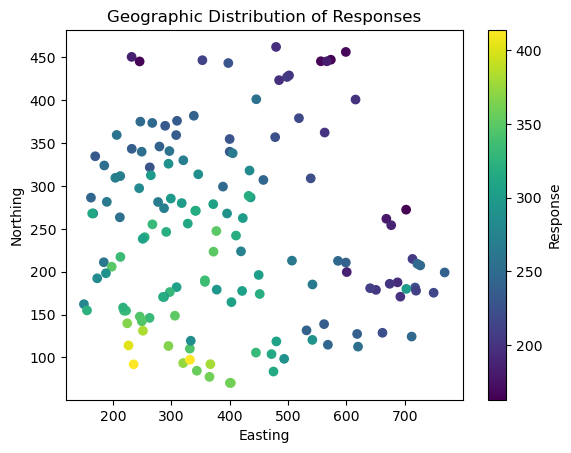

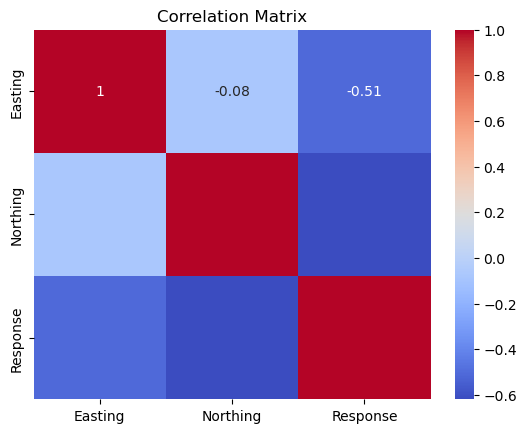

In [15]:
print(df.describe())

# Plotting scatter plots for geographic data visualization
plt.scatter(df['Easting'], df['Northing'], c=df['Response'], cmap='viridis')
plt.colorbar(label='Response')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Geographic Distribution of Responses')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# a). Calculate the optimal Bayesian classifier for a symmetric cost function.

In [16]:
import numpy as np
from scipy.stats import multivariate_normal

# Define parameters
A = np.array([[1, 0.4], [0.4, 1]])
mean_0 = np.array([0, 0])
mean_1 = np.array([1, 2])

# Bayesian decision rule function
def bayesian_decision(x):
    p_x_given_y0 = multivariate_normal(mean_0, A).pdf(x)
    p_x_given_y1 = multivariate_normal(mean_1, A).pdf(x)
    return 0 if p_x_given_y0 > p_x_given_y1 else 1


# b). Generate samples (X, Y ) of size n = 50, 100, 500.

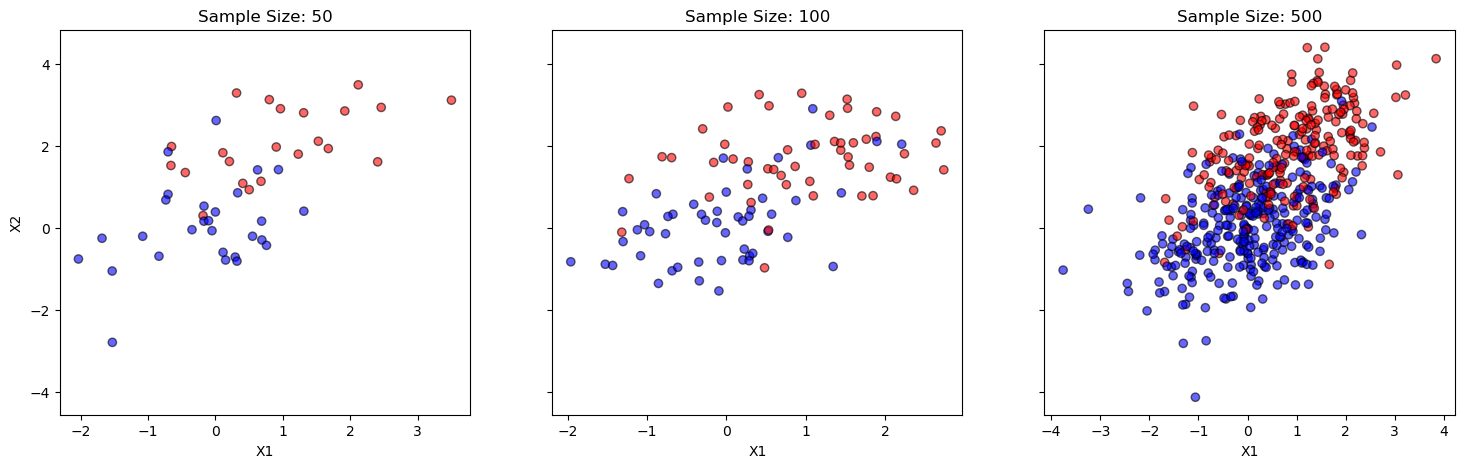

In [17]:
def generate_samples(n):
    Y = np.random.binomial(1, 0.5, n)
    X = np.array([multivariate_normal(mean_0 if y == 0 else mean_1, A).rvs() for y in Y])
    return X, Y

# Generate and plot samples
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, n in enumerate([50, 100, 500]):
    X, Y = generate_samples(n)
    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.6, edgecolor='k')
    axes[i].set_title(f'Sample Size: {n}')
    axes[i].set_xlabel('X1')
axes[0].set_ylabel('X2')
plt.show()


Above, we can visually inspect the randomly generated sample within the range and according to Bayesian principles. We can delve further into this inspection.

# c). Find and discuss suitable decision trees for these data and compare the best models obtained with cross-validation with the optimal Bayesian classifier, both visually and quantitatively.

## 500 Generated Sample:

Cross-validation scores: [0.78 0.83 0.78 0.74 0.8 ]
Mean Accuracy: 0.7859999999999999


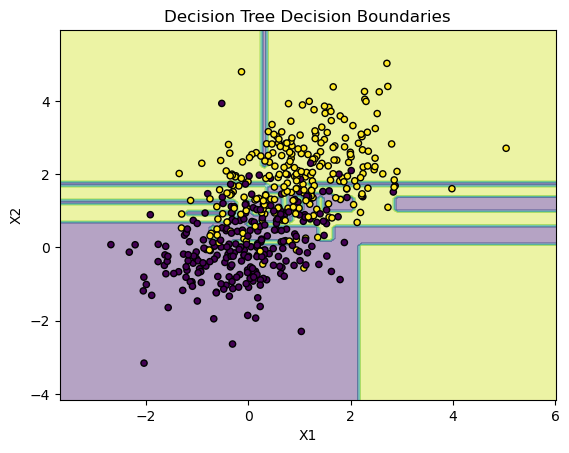

In [29]:
X, Y = generate_samples(500)  # Example with 100 samples
tree_500 = DecisionTreeClassifier()
scores_500 = cross_val_score(tree_500, X, Y, cv=5)
# print(classification_report(Y, scores_500))
tree_500.fit(X, Y)
print(f'Cross-validation scores: {scores_500}')
print(f'Mean Accuracy: {np.mean(scores_500)}')

# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In the above chart, we noticed that the model tries to cover all points but still misses some. Consequently, we compromise accuracy. However, this model will likely generalize better compared to the models trained on 100 and 50 data points because here we have more data to train on, allowing the model to learn complex patterns.

## 100 Generated Sample:

Cross-validation scores: [0.7  0.75 0.85 0.8  0.7 ]
Mean Accuracy: 0.76


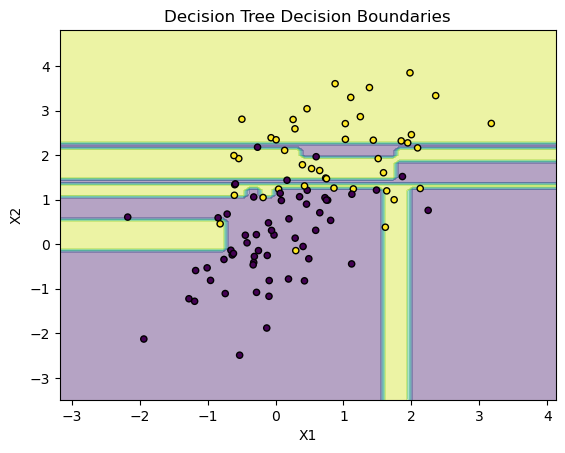

In [19]:
# Using the data from part (b)
X, Y = generate_samples(100)  # Example with 100 samples
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, Y, cv=5)

tree.fit(X, Y)
print(f'Cross-validation scores: {scores}')
print(f'Mean Accuracy: {np.mean(scores)}')

# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## 50 Generated Sample:

Cross-validation scores: [0.8 1.  0.9 0.8 1. ]
Mean Accuracy: 0.9


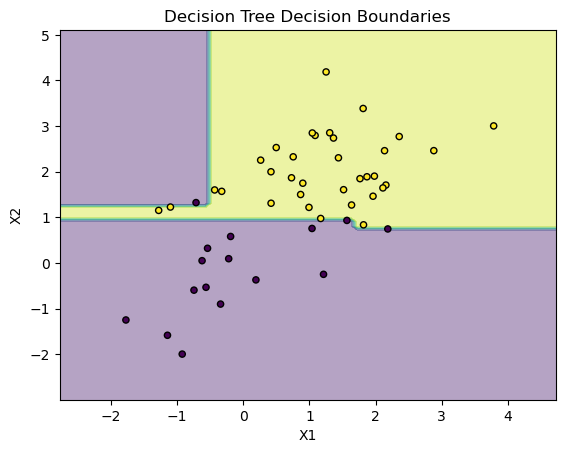

In [20]:
X, Y = generate_samples(50)  # Example with 100 samples
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, Y, cv=5)

tree.fit(X, Y)
print(f'Cross-validation scores: {scores}')
print(f'Mean Accuracy: {np.mean(scores)}')

# Visualize decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In these 50 data samples, the model's accuracy is 90%, which is commendable compared to others. The decision boundary clearly separates these classes easily. However, it's important to note that the limited data points in these 50 samples may hinder the generalization of our results. It's possible that our model didn't capture the complex patterns present in this data.